# Multiplicative cascade paper

This Notebook is a reference for the Multiplicative Cascade letter to be submitted to A&A.

First, we generate an fBm and exponentiate it.

In [19]:
%pylab inline
from pywavan import fbm2d, powspec, fan_trans
from mpl_toolkits.axes_grid1 import make_axes_locatable

Populating the interactive namespace from numpy and matplotlib


In [79]:
plt.rc('font', **{'family': 'serif', 'size': 14})
plt.rc('lines', linewidth = 2.5)
plt.rc('text', usetex=True)

In [2]:
figpath = '/Users/robitaij/postdoc/cascade_letter/paper/figures/'

In [85]:
fbm = fbm2d(-2.9, 512,512)
efbm = np.exp(0.7*fbm)

In [86]:
#Wavelet transform with angle dependency
wt, S11a, wav_k, S1a, q = fan_trans(fbm, reso=1, q=0, qdyn=False, angular=True)

## Create multiplicative cascade

In [87]:
mfrac=np.zeros(fbm.shape)

for j in range(11):
    casc=np.ones(fbm.shape)   
    for i in range(np.size(wav_k)):
        aa=np.copy(wt[i,j,:,:].real)
        bb=aa/np.std(aa)*0.10
        bb=np.exp(bb)
        casc=casc*(bb)
    mfrac+=casc

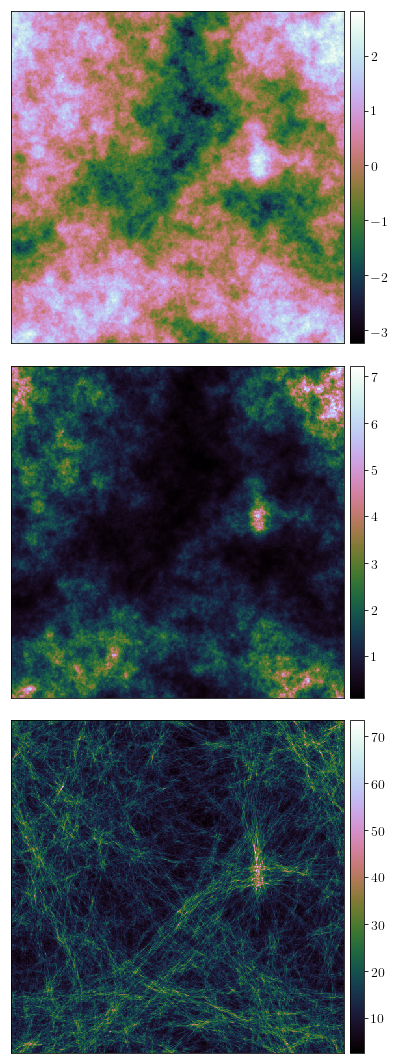

In [103]:
M = wav_k.size

figure(figsize(13/2.,30/2.))
#cmap = 'RdYlBu_r'
cmap = 'cubehelix'

subplot(3,1,1)
im1 = imshow(fbm, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax1 = divider.append_axes("right", "4%", pad="2%")
colorbar(im1, cax=cax1)

subplot(3,1,2)
im2 = imshow(efbm, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax2 = divider.append_axes("right", "4%", pad="2%")
colorbar(im2, cax=cax2)

subplot(3,1,3)
im3 = imshow(mfrac, cmap=cmap, origin='lower')
xticks([])
yticks([])
divider = make_axes_locatable(plt.gca())
cax3 = divider.append_axes("right", "4%", pad="2%")
colorbar(im3, cax=cax3)

plt.tight_layout()
plt.savefig(figpath+'fractal_models.pdf',dpi=150,bbox_inches='tight')

## PDF calculation

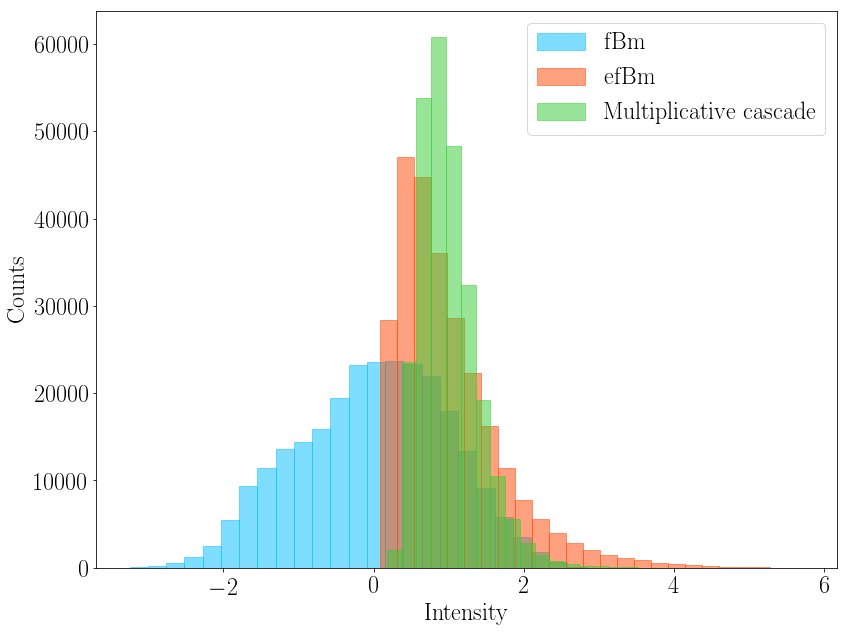

In [109]:
nbins = 25
fontsize = 24

#fbm
histo, edges = np.histogram(fbm,bins=nbins)

figure(figsize(12,9))
plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#00BFFF',facecolor='#00BFFF',alpha=0.5,\
        label= r'fBm')
xticks(fontsize=fontsize)
yticks(fontsize=fontsize)
xlabel(r'Intensity',fontsize=fontsize)
ylabel(r'Counts',fontsize=fontsize)

#efbm
histo, edges = np.histogram(efbm/mean(efbm),bins=nbins)

plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#FF4500',facecolor='#FF4500',alpha=0.5,\
        label= r'efBm')

#Multiplicative cascade
histo, edges = np.histogram(mfrac/mean(mfrac),bins=nbins)

plt.bar(edges[:-1], histo, width=np.diff(edges), align="edge",\
        edgecolor='#32CD32',facecolor='#32CD32',alpha=0.5,\
        label= r'Multiplicative cascade')

plt.legend(fontsize=fontsize)

plt.tight_layout()
plt.savefig(figpath+'PDF_models.pdf',dpi=150,bbox_inches='tight')